# Project: Wrangling and Analyze Data

In [205]:
import pandas as pd
import numpy as np
import requests
import os
import json
from bs4 import BeautifulSoup
from timeit import default_timer as timer

import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [206]:
df_twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [207]:
df_twitter_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [208]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [209]:
df_predict = pd.read_csv('image_predictions.tsv', sep = '\t')
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [210]:
tweet_ids = df_twitter_enhanced.tweet_id.values
len(tweet_ids)


2356

In [211]:
'''
import tweepy
from tweepy import OAuthHandler

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "SECRET"
consumer_secret = "SECRET"
access_token = "SECRET"
access_secret = "SECRET"


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = "SECRET"\nconsumer_secret = "SECRET"\naccess_token = "SECRET"\naccess_secret = "SECRET"\n\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive

Note to evaluator. Because of changes to twitter I wasn't able to gain access to elevated access via the twitter portal. Please see error log for details. For the rest of the project I will be proceeding with the instructor provided 'tweet-json.txt' file. But I wanted to document the effort to obtain the information via the tweety api.

In [212]:
#Convert txt file to a list where each line contains one piece of tweet information
tweet_json_list = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet_json_list.append(json.loads(line))


In [213]:
print(tweet_json_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [214]:
#Create a panda dataframe from tweet_json_list that contains id, retweet count and favorite count

tweets_df = pd.DataFrame(tweet_json_list,columns = ['id','retweet_count','favorite_count'])


In [215]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [216]:
#Save to csv file
tweets_df.to_csv('tweets.csv', index=False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter Archive

df_twitter_enhanced columns description:

- **tweet_id:** the unique identifier for each tweet
- **in_reply_to_status_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id:** if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp:** time when this Tweet was created
- **source:** utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text:** actual UTF-8 text of the status update
- **retweeted_status_id:** if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- **retweeted_status_user_id:** if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- **retweeted_status_timestamp:** time of retweet
- **expanded_urls:** tweet URL
- **rating_numerator:** numerator of the rating of a dog. Note: ratings almost always greater than 10
- **rating_denominator:** denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- **name:** name of the dog
- **doggo:** one of the 4 dog "stage"
- **floofer:** one of the 4 dog "stage"
- **pupper:** one of the 4 dog "stage"
- **puppo:** one of the 4 dog "stageColumns description:


In [217]:
df_twitter_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [218]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [219]:
df_twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [220]:
df_twitter_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [221]:
df_twitter_enhanced.duplicated().sum()

0

In [222]:
df_twitter_enhanced.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Bailey        7
an            7
Buddy         7
Toby          7
Scout         6
Dave          6
Stanley       6
Jax           6
Bella         6
Rusty         6
Koda          6
Leo           6
Milo          6
Oscar         6
Jack          6
Louis         5
           ... 
Miley         1
Sonny         1
Chef          1
DonDon        1
Jareld        1
Tanner        1
Stella        1
Jett          1
Alfy          1
Sunshine      1
Rontu         1
Bubba         1
Brutus        1
Tobi          1
Robin         1
Ralf          1
Tess          1
Claude        1
Roscoe        1
space         1
Suki          1
Tassy         1
Carll         1
Maisey        1
Willie        1
Ralphus       1
Ralph         1
Kellogg       1
Tycho         1
Tom           1
Name: name, Length: 957,

In [223]:
df_twitter_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [224]:
df_twitter_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [225]:
df_twitter_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [226]:
df_twitter_enhanced[df_twitter_enhanced.rating_numerator == 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [227]:
df_twitter_enhanced[df_twitter_enhanced.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [228]:
df_twitter_enhanced[df_twitter_enhanced.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [229]:
df_twitter_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [230]:
df_twitter_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [231]:
df_twitter_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [232]:
df_twitter_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [233]:
df_twitter_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

Inspecting to see if any of the rows contain more than one of these non numerical ratings.

In [234]:
#Creating a mask and using it to filter out rows that have more than one non numerical ratings
from numpy import nan
columns = ['pupper','doggo','floofer','puppo']
more_than_one = df_twitter_enhanced[columns].replace("None",nan).count(axis='columns') > 1

df_twitter_enhanced[more_than_one]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


### Image prediction data

df_predict columns description:

- **tweet_id:** the unique identifier for each tweet

- **jpg_url:** dog's image URL

- **img_num:** the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

- **p1:** algorithm's #1 prediction for the image in the tweet

- **p1_conf:** how confident the algorithm is in its #1 prediction

- **p1_dog:** whether or not the #1 prediction is a breed of dog

- **p2:** algorithm's #2 prediction for the image in the tweet

- **p2_conf:** how confident the algorithm is in its #2 prediction

- **p2_dog:** whether or not the #2 prediction is a breed of dog

- **p3:** algorithm's #3 prediction for the image in the tweet

- **p3_conf:** how confident the algorithm is in its #3 prediction

- **p3_dog:** whether or not the #3 prediction is a breed of dog

In [235]:
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [236]:
df_predict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
704,684926975086034944,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,1,Labrador_retriever,0.769412,True,golden_retriever,0.144893,True,lion,0.021440,False
1491,782747134529531904,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,0.560699,True,otterhound,0.199482,True,clumber,0.040682,True
967,706310011488698368,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,1,Pembroke,0.698165,True,Chihuahua,0.105834,True,bloodhound,0.062030,True
74,667393430834667520,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True
791,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False
237,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,window_shade,0.583427,False,giant_schnauzer,0.062215,True,window_screen,0.039941,False
1279,750117059602808832,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,Shih-Tzu,0.814405,True,Lhasa,0.175220,True,Pekinese,0.008072,True
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False


In [237]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [238]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [239]:
df_predict.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

### Additional scraped Twitter data

tweets_df columns description

-**id:** the unique identifier for each tweet

-**retweet_count:** the number of times the original tweet was retweeted

-**favorite_count:** the number of times the the original tweet was loved or liked


In [240]:
tweets_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [241]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [242]:
tweets_df.shape

(2354, 3)

In [243]:
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [244]:
tweets_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [245]:
tweets_df.sample(10)

,id,retweet_count,favorite_count
419,822163064745328640,5571,0
1251,710833117892898816,606,2937
526,808733504066486276,2509,8784
87,875097192612077568,6342,27997
1153,724983749226668032,1462,4040
1369,702276748847800320,860,2706
625,795076730285391872,6288,18139
2220,668466899341221888,560,936
2138,670003130994700288,100,352
1873,675113801096802304,877,2120


In [246]:
tweets_df.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [247]:
tweets_df.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [248]:
tweets_df.duplicated().sum()

0

### Quality issues
- 1. Incorrect datatypes for the timestamp and retweeted_status_timestamp columns in the df_twitter_enhanced dataframe. Datatype is int instead of datetime

- 2. Incorrect datatype for the tweet_id in all 3 dataframes. Datatype is int when it should be string because it categorical data

- 3. Missing values in the name column are "None" instead of nan in the df_twitter_enhanced dataframe

- 4. The df_predict dataframe has inconsistent use of capitalization in the p1,p2 and p3 columns that affects readability

- 5. The df_twitter_enhanced dataframe contains retweets that are not needed

- 6. 'name' values in the df_twitter_enhanced dataset that are all lowercase are invalid entries (i.e. not dog names). Confirmed that the dogs names that started with a lower case are not dog names

- 7. Column names in the predict_df dataframe not descriptive enough

- 8. Source column in the twitter_enhanced dataframe is in HTML-formatted string not a normal string

- 9. The column label for tweet ids should be consistent across the 3 datasets so they can be joined correctly.


### Tidiness issues
- 1. doggo, floofer, pupper and puppo columns in the df_twitter_enhanced dataframe should be merged into one column.
- 2. The 3 dataframes should be combined into on single dataset.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [249]:
# Make copies of original pieces of data
twitter_enhanced_clean = df_twitter_enhanced.copy()

In [250]:
df_predict_clean = df_predict.copy()

In [251]:
tweets_df_clean = tweets_df.copy()

In [252]:
#Verify copy was created correctly
twitter_enhanced_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [253]:
#Verify copy was created correctly
df_predict_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [254]:
#Verify copy was created correctly
tweets_df_clean.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


### Issue #1:

Incorrect datatypes for the timestamp and retweeted_status_timestamp columns in the df_twitter_enhanced dataframe. Datatype is int instead of datetime

#### Define:

Convert timestamp and retweeted_status_timestamp columns to datetime

#### Code

In [255]:
#Convert timestamp to datetime
twitter_enhanced_clean['timestamp'] = pd.to_datetime(twitter_enhanced_clean['timestamp'])

In [256]:
twitter_enhanced_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_enhanced_clean['retweeted_status_timestamp'])

#### Test

In [257]:
#Verify if datatype has changed. 
twitter_enhanced_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #2:
Incorrect datatype for the tweet_id in all 3 dataframes. Datatype is int when it should be string because it categorical data

#### Define

Convert tweet id column from integer to string for all datasets.

#### Code

In [258]:
twitter_enhanced_clean['tweet_id'] = twitter_enhanced_clean['tweet_id'].astype(str)

In [259]:
df_predict_clean['tweet_id'] = df_predict_clean['tweet_id'].astype(str)

In [260]:
tweets_df_clean['id'] = tweets_df_clean['id'].astype(str)

#### Test

In [261]:
#Verify datatype has changed
twitter_enhanced_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [262]:
#Verify datatype has changed
df_predict_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [263]:
#Verify datatype has changed
tweets_df_clean.dtypes

id                object
retweet_count      int64
favorite_count     int64
dtype: object

### Issue #3:
Missing values in the name column are "None" instead of nan in the df_twitter_enhanced dataframe

#### Define
Replace all the null vlaues that are written as 'None' with NaN in the twitter_enchanced dataframe for consistency.

#### Code

In [264]:
#Replace all null values represented as "None" with NaN
twitter_enhanced_clean.replace(to_replace="None",value=np.nan, inplace=True)

#### Test

In [265]:
#Verify cleaning has worked
twitter_enhanced_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,NaN,NaN,NaN,NaN
945,752660715232722944,NaN,NaN,2016-07-12 00:27:52,"<a href=""http://twitter.com/download/iphone"" r...",Hooman used Pokeball\n*wiggle*\n*wiggle*\nDogg...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/752660715...,10,10,NaN,doggo,NaN,NaN,NaN
1072,739979191639244800,NaN,NaN,2016-06-07 00:36:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Nollie. She's waving at you. If you do...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,NaN,NaN,NaN,NaN


In [266]:
twitter_enhanced_clean.name.value_counts()

a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
Sadie        8
the          8
Toby         7
Daisy        7
Bailey       7
Buddy        7
an           7
Milo         6
Rusty        6
Bella        6
Koda         6
Dave         6
Oscar        6
Stanley      6
Jack         6
Jax          6
Scout        6
Leo          6
very         5
George       5
            ..
Bobbay       1
Miley        1
Sonny        1
Chef         1
DonDon       1
Kloey        1
space        1
Aubie        1
Claude       1
Jett         1
Sunshine     1
Rontu        1
Bubba        1
Brutus       1
Tobi         1
Robin        1
Ralf         1
Tess         1
Alfy         1
Tycho        1
Roscoe       1
Suki         1
Tassy        1
Carll        1
Maisey       1
Willie       1
Ralphus      1
Ralph        1
Kellogg      1
Tom          1
Name: name, Length: 956, dtype: int64

### Issue #4:
The df_predict dataframe has inconsistent use of capitalization in the p1,p2 and p3 columns that affects readability.

#### Define
Change all p1, p2 and p3 values to lower case.

In [267]:
df_predict_clean['p1'] = df_predict['p1'].str.lower()
df_predict_clean['p2'] = df_predict['p2'].str.lower()
df_predict_clean['p3'] = df_predict['p3'].str.lower()

#### Test

In [268]:
df_predict_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,french_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True
1622,803380650405482500,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,bookcase,0.890601,False,entertainment_center,0.019287,False,file,0.009490,False
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,labrador_retriever,0.148496,True,golden_retriever,0.148482,True
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,american_staffordshire_terrier,0.569501,True,staffordshire_bullterrier,0.211308,True,chihuahua,0.121839,True
300,671488513339211776,https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg,1,hermit_crab,0.528761,False,snail,0.185644,False,shower_curtain,0.066361,False
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,west_highland_white_terrier,0.119247,True
648,681694085539872773,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,toy_poodle,0.920992,True,miniature_poodle,0.060857,True,maltese_dog,0.006064,True
748,687807801670897665,https://pbs.twimg.com/media/CYuVi9pWwAAbOGC.jpg,1,staffordshire_bullterrier,0.151113,True,boxer,0.135697,True,american_staffordshire_terrier,0.086591,True
1545,792050063153438720,https://pbs.twimg.com/media/Cv3tU38WcAASFas.jpg,2,komondor,0.942856,True,swab,0.052715,False,tibetan_terrier,0.002743,True


### Issue #5
The df_twitter_enhanced dataframe contains retweets that are not needed

#### Define
Remove retweets since they are not needed then remove the empty columns.

In [269]:
no_retweets = twitter_enhanced_clean.retweeted_status_id.isnull()
twitter_enhanced_clean = twitter_enhanced_clean[no_retweets]

In [270]:
twitter_enhanced_clean.retweeted_status_id.notnull().sum()

0

In [271]:
twitter_enhanced_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
                           axis=1, inplace=True)

#### Test

In [272]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 254.9+ KB


### Issue #6:
'name' values in the df_twitter_enhanced dataset that are all lowercase are invalid entries (i.e. not dog names). Confirmed via visual inspection that the dogs names that started with a lower case are not dog names

#### Define
Remove all values in the name column in the df_twitter_enhanced dataset that start with lowercase letters and replace with the string "None"

In [273]:
#Recast name variable as string to allow list iteration
#Previous cleaning had replaced all "none" values with Nan and created a mixed datatype object
twitter_enhanced_clean['name'] = twitter_enhanced_clean['name'].astype(str)

In [274]:
#Create an empty list then iterate through the name column in the dataframe
# and append non dog names to list

not_dog_names = []

for name in twitter_enhanced_clean.name:
    if name.islower() and name not in not_dog_names:
        not_dog_names.append(name)
    
print(not_dog_names)

['nan', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [275]:
#Replace the names in the not_dog_names list with "None"
twitter_enhanced_clean.name.replace(not_dog_names,"None", inplace=True)

#### Test

In [276]:
#If nothing prints from this loop then the invalid entries have been replaced
# Nothing prints when this code is run, So the lowercase entries are cleared.
for name in twitter_enhanced_clean.name:
    if name.islower():
        print(name)

In [277]:
#Convert None values to NaN for uniformity
twitter_enhanced_clean['name'].replace(to_replace='None', value=np.nan, inplace=True)

In [278]:
twitter_enhanced_clean['name'].sample(10)

2154        Penny
161       Lorenzo
1734          NaN
756       Strider
799     Roosevelt
1666          NaN
255         Margo
1774          NaN
1389        Dotsy
526           Ito
Name: name, dtype: object

### Issue #7:
Column names in df_predict dataframe not descriptive enough


#### Define 
Rename columns


In [279]:
df_predict_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [280]:
df_predict_clean = df_predict_clean.rename(columns = {'jpg_url':'img_url', 'p1':'prediction1', 'p2':'prediction2', 'p3':'prediction3','p1_conf':'prediction1_config',
                                                     'p2_conf':'prediction2_config','p3_conf':'prediction3_config', 'p1_dog':'prediction1_dog','p2_dog':'prediction2_dog',
                                                     'p3_dog':'prediction3_dog'})

#### Test

In [281]:
df_predict_clean.columns

Index(['tweet_id', 'img_url', 'img_num', 'prediction1', 'prediction1_config',
       'prediction1_dog', 'prediction2', 'prediction2_config',
       'prediction2_dog', 'prediction3', 'prediction3_config',
       'prediction3_dog'],
      dtype='object')

### Issue #8:

Source column in the twitter_enhanced dataframe is in HTML-formatted string not a normal string


#### Define
Correct to created a normal string.

In [282]:
twitter_enhanced_clean['source'] = twitter_enhanced_clean['source'].str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [283]:
twitter_enhanced_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #9 
The column label for tweet ids should be consistent across the 3 datasets so they can be joined correctly.


#### Define
Change the column label from 'id' to 'tweet_id' in the tweets_df dataset

In [284]:
#Rename the id columns to tweet_id to match the other dataframes
tweets_df_clean = tweets_df.rename(columns = {'id':'tweet_id'})


In [285]:
#Recasting as a string
tweets_df_clean['tweet_id'] = tweets_df_clean['tweet_id'].astype(str)

#### Test

In [286]:
tweets_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [287]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [288]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 254.9+ KB


In [289]:
df_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null object
img_url               2075 non-null object
img_num               2075 non-null int64
prediction1           2075 non-null object
prediction1_config    2075 non-null float64
prediction1_dog       2075 non-null bool
prediction2           2075 non-null object
prediction2_config    2075 non-null float64
prediction2_dog       2075 non-null bool
prediction3           2075 non-null object
prediction3_config    2075 non-null float64
prediction3_dog       2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #1 (Tidy):

doggo, floofer, pupper and puppo columns in the df_twitter_enhanced dataframe should be merged into one column.

#### Define

doggo, floofer, pupper and puppo columns in the df_twitter_enhanced dataframe should be merged into one column.

In [291]:
STAGES = ['doggo', 'pupper','floofer', 'puppo']
COLUMNS = [i for i in twitter_enhanced_clean.columns.tolist() if i not in STAGES]


twitter_archive_cleaned = pd.melt(twitter_enhanced_clean, id_vars = COLUMNS, value_vars = STAGES, 
                         var_name = 'stages', value_name = 'dog_stage')





In [303]:
twitter_enhanced_clean = twitter_archive_cleaned

In [304]:
# Delete column 'stages'
twitter_enhanced_clean = twitter_enhanced_clean.drop('dog_stage', 1)

#### Test

In [305]:
twitter_enhanced_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages
4897,788908386943430656,NaN,NaN,2016-10-20 01:03:11,Twitter for iPhone,"This is Lucy. She destroyed not one, but two r...",https://twitter.com/dog_rates/status/788908386...,11,10,Lucy,floofer
6183,672239279297454080,NaN,NaN,2015-12-03 02:21:48,Twitter for iPhone,This is Ridley. He doesn't know how to couch. ...,https://twitter.com/dog_rates/status/672239279...,7,10,Ridley,floofer
130,863427515083354112,8.634256e+17,77596200.0,2017-05-13 16:15:35,Twitter for iPhone,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10,NaN,doggo
2659,799297110730567681,NaN,NaN,2016-11-17 17:04:16,Twitter for iPhone,This is Jeffrey. He's quite the jokester. Take...,https://twitter.com/dog_rates/status/799297110...,11,10,Jeffrey,pupper
1777,673612854080196609,NaN,NaN,2015-12-06 21:19:54,Twitter for iPhone,This is Jeffri. He's a speckled ice pupper. Ve...,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,doggo


In [306]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 11 columns):
tweet_id                 8700 non-null object
in_reply_to_status_id    312 non-null float64
in_reply_to_user_id      312 non-null float64
timestamp                8700 non-null datetime64[ns]
source                   8700 non-null object
text                     8700 non-null object
expanded_urls            8468 non-null object
rating_numerator         8700 non-null int64
rating_denominator       8700 non-null int64
name                     5564 non-null object
stages                   8700 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 747.7+ KB


### Issue #2 (Tidy):
The 3 dataframes should be combined into on single dataset.

#### Define
Merge the three dataframes to become one dataframe and merge them on tweet_id column

In [307]:
weratedogs_dataset = pd.merge(twitter_enhanced_clean, tweets_df_clean, on='tweet_id', how='left')


In [308]:
weratedogs_dataset = pd.merge(weratedogs_dataset, df_predict_clean, on='tweet_id', how='left')

In [309]:
weratedogs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8700 entries, 0 to 8699
Data columns (total 24 columns):
tweet_id                 8700 non-null object
in_reply_to_status_id    312 non-null float64
in_reply_to_user_id      312 non-null float64
timestamp                8700 non-null datetime64[ns]
source                   8700 non-null object
text                     8700 non-null object
expanded_urls            8468 non-null object
rating_numerator         8700 non-null int64
rating_denominator       8700 non-null int64
name                     5564 non-null object
stages                   8700 non-null object
retweet_count            8700 non-null int64
favorite_count           8700 non-null int64
img_url                  7976 non-null object
img_num                  7976 non-null float64
prediction1              7976 non-null object
prediction1_config       7976 non-null float64
prediction1_dog          7976 non-null object
prediction2              7976 non-null object
prediction2_c

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [310]:
weratedogs_dataset.to_csv('twitter_archive_master.csv', index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [311]:
#Checking to see what the most popular app source for the tweets are
source = weratedogs_dataset['source'].value_counts()
source

Twitter for iPhone     8168
Vine - Make a Scene     364
Twitter Web Client      124
TweetDeck                44
Name: source, dtype: int64

In [312]:
#Checking to see what the most popular 10 dog names are
popular_name = weratedogs_dataset.name.value_counts()[1:10]
popular_name


Charlie    44
Oliver     40
Cooper     40
Tucker     36
Penny      36
Lola       32
Winston    32
Sadie      32
Daisy      28
Name: name, dtype: int64

In [120]:
weratedogs_dataset.prediction1.value_counts()

golden_retriever             139
labrador_retriever            95
pembroke                      88
chihuahua                     79
pug                           54
chow                          41
samoyed                       40
pomeranian                    38
toy_poodle                    38
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            22
seat_belt                     21
siberian_husky                20
german_shepherd               20
staffordshire_bullterrier     19
shetland_sheepdog             18
maltese_dog                   18
eskimo_dog                    18
teddy                         18
rottweiler                    17
cardigan                      17
beagle                        17
shih-tzu                      17
lakeland_terrier              16
kuvasz                        16
italian_greyhound             16
web_site                      15
          

In [121]:
weratedogs_dataset.prediction2.value_counts()

labrador_retriever                96
golden_retriever                  82
cardigan                          73
chihuahua                         43
chesapeake_bay_retriever          40
pomeranian                        39
french_bulldog                    39
toy_poodle                        36
siberian_husky                    33
cocker_spaniel                    32
miniature_poodle                  32
beagle                            28
eskimo_dog                        27
collie                            26
pembroke                          25
kuvasz                            24
italian_greyhound                 22
pekinese                          21
malinois                          20
american_staffordshire_terrier    20
chow                              20
miniature_pinscher                20
norwegian_elkhound                19
toy_terrier                       19
samoyed                           19
boston_bull                       19
staffordshire_bullterrier         18
p

In [122]:
weratedogs_dataset.prediction3.value_counts()

labrador_retriever                76
chihuahua                         57
golden_retriever                  46
eskimo_dog                        36
kelpie                            33
chow                              31
kuvasz                            31
beagle                            30
staffordshire_bullterrier         30
cocker_spaniel                    29
toy_poodle                        29
pekinese                          28
pomeranian                        27
great_pyrenees                    26
pembroke                          26
malamute                          25
french_bulldog                    25
chesapeake_bay_retriever          24
cardigan                          23
american_staffordshire_terrier    23
pug                               21
basenji                           20
bull_mastiff                      19
siberian_husky                    19
toy_terrier                       18
shetland_sheepdog                 17
boston_bull                       17
b

### Insights:
1. Most tweets were made on the twitter for iPhone app

2. The most popular dog name was Charlie with 11 occurances

3. The most commonly predicted dog breeds were Golden Retrievers, Labrador Retrievers and Chihuahuas

### Visualization

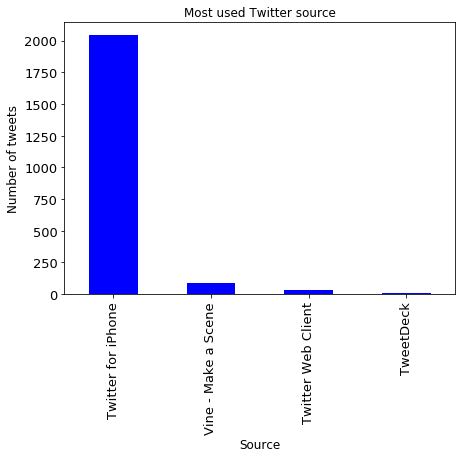

In [112]:
source_bar = source.plot.bar(color = 'blue', fontsize = 13)


source_bar.figure.set_size_inches(7, 5);


plt.title('Most used Twitter source', color = 'black', fontsize = '12')
plt.xlabel('Source', color = 'black', fontsize = '12')
plt.ylabel('Number of tweets', color = 'black', fontsize = '12');

Text(0,0.5,'Number of occurrence')

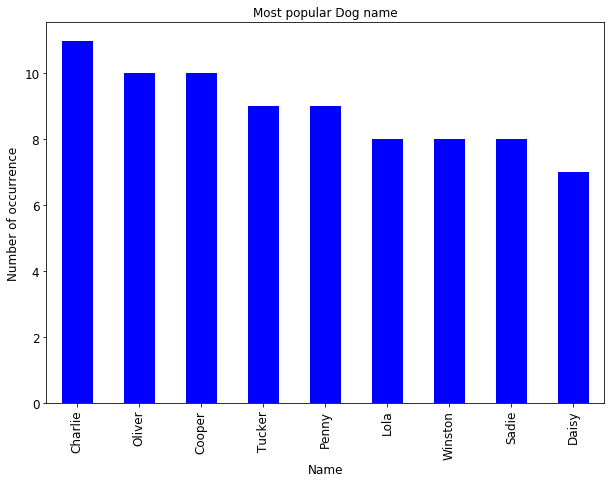

In [114]:
#plot
p_bar = popular_name.plot.bar(color = 'blue', fontsize = 12)

#figure size(width, height)
p_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Most popular Dog name', color = 'black', fontsize = '12')
plt.xlabel('Name', color = 'black', fontsize = '12')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '12')